<h3><center>Due Date: October 22, 2021 <br/>TA: Júlio Oliva Frigério (juliojof@stanford.edu)</center></h3> 

<h1><center>Lab2: Causal and anti-causal integration plus fun
with adjoints (Python version)</center></h1>

<h3><center><em>Your Name Here<em/></center></h3> 

---
**Abstract**

You are first given a subroutine 
which performs causal and anti-causal integration. Your task is to code the dot-product test to verify
that the given anti-causal integration is the adjoint of the causal 
integration. Then you will have to answer some questions and apply the
concept of causal and anti-causal integration. Secondly, you will have
several subroutines with the adjoints removed. The adjoints are also
provided, so you simply have to match the correct adjoint with each
subroutine.

---


<h2><center>INTRODUCTION<h2/>

Causal integration is defined as:
$$
y(t) = \int_{-\infty}^t x(t) dt
$$

The following triangular matrix is being implemented as the discrete version of causal integration (see section 2.1.6 of BEI):

$$\begin{equation}
  \left[
	\begin{array}{c}
		y_0 \\
		y_1 \\
		y_2 \\
		y_3 \\
		y_4 \\
		y_5 \\
		y_6 \\
		y_7 \\
		y_8 \\
		y_9 \\
	\end{array}
  \right]
 \quad = \quad
  \left[
	\begin{array}{ccccccccccc}
	1&0&0&0&0&0&0&0&0&0 \\
	1&1&0&0&0&0&0&0&0&0 \\
	1&1&1&0&0&0&0&0&0&0 \\
	1&1&1&1&0&0&0&0&0&0 \\
	1&1&1&1&1&0&0&0&0&0 \\
	1&1&1&1&1&1&0&0&0&0 \\
	1&1&1&1&1&1&1&0&0&0 \\
	1&1&1&1&1&1&1&1&0&0 \\
	1&1&1&1&1&1&1&1&1&0 \\
	1&1&1&1&1&1&1&1&1&1
	\end{array}
  \right]
  \ \ 
  \left[
	\begin{array}{c}
		x_0 \\
		x_1 \\
		x_2 \\
		x_3 \\
		x_4 \\
		x_5 \\
		x_6 \\
		x_7 \\
		x_8 \\
		x_9 \\
	\end{array}
  \right]
\label{eq:mytri}\tag{1}
\end{equation}
$$

The adjoint of causal integration is anti-causal integration.
If we call the matrix in equation [1](#mjx-eqn-eq1) ${\bf C}$, transposing it to
get ${\bf C'}$ and applying it to ${\bf y}$ gives us something back in the
space of ${\bf x}$, namely $\tilde{\bf x} = {\bf C' y}$.

The code for anti-causal integration is not always obvious
from the code for integration, and it is easy to make little
mistakes. To verify that the code for causal 
integration and anti-causal integration are really adjoint 
to each other, the dot-product test has to be performed.
The vectors ${\bf x}$ and ${\bf y}$ are loaded with random numbers. Then 
$\tilde{\bf y} = {\bf C x}$ and $\tilde{\bf x} = {\bf C' y}$
have to fullfill the following relationship: 
${\bf y' (C x) = (C' y)' x}$.

To understand the adjoint, you need to inspect
the detailed form of the expression $\tilde{\bf x} = {\bf C' y}$.

<h2><center>CAUSAL AND ANTI-CAUSAL INTEGRATION<h2/>

In [ ]:
#################################################################
# This code block imports the necessary python modules needed for this lab
#################################################################
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#################################################################
## This code block contains the definition of the causal integration. 
## You will be altering and adding code to the functions 
## in order to answer the questions below.
#################################################################
class Operator():
    def __init__(self):
        pass

    def forward(self, add, model, data):
        print("Not implemented")
        
    def adjoint(self, add, model, data):
        print("Not implemented")

    def dotTest(self, model, data):
        xtilde = np.zeros(model.size)
        ytilde = np.zeros(data.size)
        # fill model and data with random numbers
        iseed=1992
        np.random.seed(seed=iseed)
        model = np.random.rand(model.size)
        data = np.random.rand(data.size)

        # fill in computation for ytilde
        #your code here
        # fill in computation for xtilde
        #your code here

        # calculate the inner product:
        xscalar = np.dot(xtilde,model)
        yscalar = np.dot(ytilde,data)

        return np.abs(1. - xscalar/yscalar)
        
        
class CausalIntegration(Operator):
    def __init__(self):
        super().__init__()

    def forward(self, add, model, data):
        if (not add): data *= 0
        temp = 0
        for i in range(data.size):
            data[i] += model[i] + temp
            temp = data[i]

    def adjoint(self, add, model, data):
        if (not add): model *= 0
        temp = 0
        for i in range(data.size-1,-1,-1):
            # your code here

def runCausalIntegration(n1=32,n2=7):
        data = np.zeros((n1,n2))

        # create the object
        causint = CausalIntegration()

        # in1
        data[int(n1/2),0] = 1.
        causint.forward( 0, data[:,0], data[:,1] ) # C in1
        causint.forward( 0, data[:,1], data[:,2] ) # CC in1
        
        # in2:
        data[int(n1/3),3] = 1.
        data[int(2*n1/3),3] = -1.
        causint.forward( 0, data[:,3], data[:,4] ) # C in2
        causint.forward( 0, data[:,4], data[:,5] ) # CC in2
        causint.forward( 0, data[:,5], data[:,6] ) # CCC in2

        return data

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


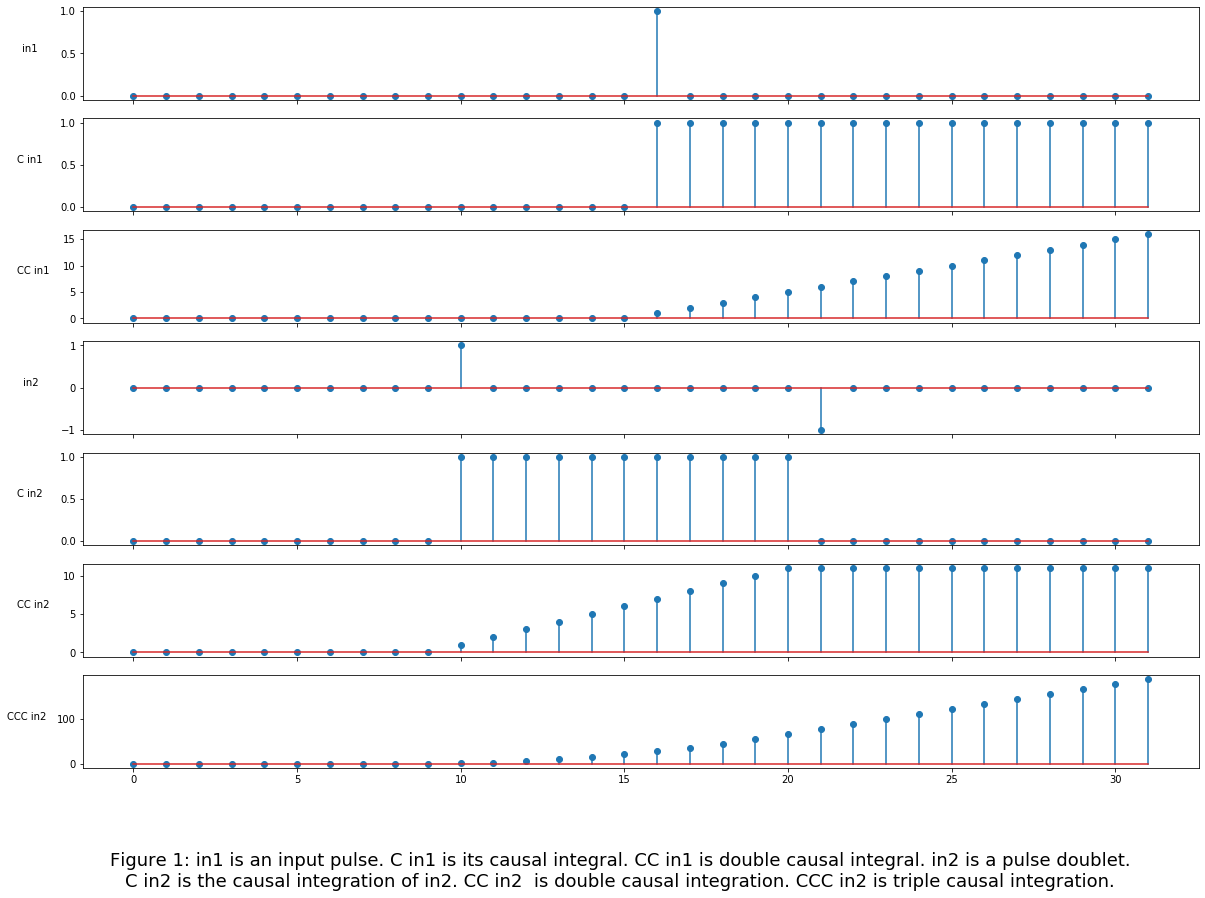

In [ ]:
#################################################################
## This block runs causal integration and plots the results
#################################################################

# Runs Causint function
data = runCausalIntegration()

# Plots data, the result of Causint
fig, axs = plt.subplots(7, 1, figsize=(20, 14), sharex=True)

#This list of strings is used to make the titles seen on the left side of each subplot.
titles=['in1','C in1','CC in1','in2','C in2','CC in2','CCC in2']

#loop over the seven subplots and plot them using the 'stem' plotting tool
for i in np.arange(7):
    axs[i].stem(data[:,i])
    axs[i].set_ylabel(titles[i],rotation=0,labelpad=30)
plt.rc('text')


#This adds the caption under the figure
plt.figtext(0.5, 0.01, r'Figure 1: in1 is an input pulse. C in1 is its causal integral. CC in1 is double causal integral. in2 is a pulse doublet. ' '\n' r'C in2 is the causal integration of in2. CC in2  is double causal integration. CCC in2 is triple causal integration. ', wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

1. Change the location of the input spike on the first line of
Figure 1 by editing the program <tt>runCausalIntegration<tt>.

2. After you have made your changes, rerun the jupyter cell that runs causal integration and plot the results.

3. Generate a new figure similar to Figure 1 so that the third plot becomes the anti-causal integration of <tt>in1</tt> and the
sixth plot -- the anti-causal integration
of <tt>in2</tt> (do not modify the code for other plots).  To do that you will first implement the correct adjoint of the operator and modify the <tt>runCausalIntegration<tt>.

4. Before you start to work with the causal and anti-causal integration,
you have to make sure that the operator given by <tt>CausalIntegration</tt> really 
defines two adjoint processes, i.e. make sure that the 
anti-causal integration is really the
adjoint of the causal integration. To do that, you will have to
perform the dot-product test. You will have to change the method <tt>dotTest</tt> defined in the base class <tt>Operator</tt>.  
You must 
code $\tilde {\bf x} = {\bf C' y}$ and $\tilde {\bf y} = {\bf C x}$ by filling in the two missing lines.
If the forward and adjoint are correctly implemented, the relative difference between the two
numbers <tt>xscalar</tt> and <tt>yscalar</tt> should be close to machine-precision and non-zero.

In [ ]:
model = np.zeros(100)
data = np.zeros(100)
# perform the dot-product test
causint = CausalIntegration()
causint.dotTest(model,data)

4.440892098500626e-16

5. After you have checked that the program does what it is supposed to do,
change the signal named <tt>in2</tt> so that the sixth line in
Figure 1 turns out to be a triangle function which is
symmetrically placed in time with respect to the signal <tt>in2</tt>. 
(Hint:  Try ${\bf C' C}$ or ${\bf C C'}$.)  You will once again be
editing <tt>runCausalIntegration</tt>.

6. Now change your signal in such a way that you obtain an antisymmetrical 
triangle function instead of a symmetrical triangle function (one side 
is longer than the other). Plot the result on the seventh line in Figure 1.
Describe what has to be changed with respect 
to the symmetric triangle function.

> **<tt>Your answer:</tt>**  Type answer here. 

7. Change the plot labels and the figure caption:
    - Change the labels in the plot by editing the Jupyter cell that runs causal integration and plots the results (you  only need to edit the list of strings for the titles. No need to edit the matplotlib syntax). Correct them to describe your calculation. 

    - Change the caption in the plot by editing the Jupyter cell that runs causal integration and plots the results (you  only need to edit the text within the 'plt.figtext' function call. No need to edit the matplotlib syntax). Correct them to describe your calculation. 

8. What you have done in this lab, is convolving a spike (delta) function with a triangle function, by two passes of causal integration. Triangle smoothing is popular amongst geophysicists because of its speed. Integration is fast because it is recursive.

    - How does the cost of triangle smoothing compare with the cost
of smoothing by applying a time-domain convolution filter? (Hint: how
do the costs vary with the length of smoothing operator).

    > **<tt>Your answer:</tt>**  Type answer here. 

    - If you were to filter with a triangle a few more times, it would
quickly become equivalent to smoothing with what function? 

    > **<tt>Your answer:</tt>**  Type answer here. 

<h2><center>FUN WITH ADJOINTS<h2/>

Understanding the adjoint operator for each forward operator is important. Most of geophysics is based on knowing how to convert from model space to data space and back again. The following exercise is designed to help you learn what the adjoint to a particular operator will be, without asking you to code it.

The first subsection has several subroutines with the adjoints
removed. The second subsection has several orphaned adjoints.
Your task is to determine which adjoint belongs in which subroutine.
You can then move the proper adjoint into the proper subroutine by double clicking on the cell containing the adjoint, copying the code, and pasting it in the proper subroutine where is says <tt>INSERT ADJOINT</tt>.

Note that there are more adjoints than there are subroutines -- I've
got to make it tricky for you, right? 

Explain how you found the adjoint in each case. Any logical explanation is
valid, from the simplest to the most complex. You will find a place to enter you explanation under each subroutine.

## Subroutines

### Subroutine 1

```
subroutine charming(adj, add, xx, nx, yy, ny)
    
integer i1, i2, adj, add, nx, ny
real    xx(nx), yy(ny)

if( add == 0 )
    if( adj == 0 )
                do i2= 1, ny
                        yy(i2) = 0.
        else

						INSERT ADJOINT

return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 2

```
subroutine bashful( adj, add, nx, array, nb, xx, yy)

integer i2, i1, ny, adj, add, nx, nb
real    array(nx)               
real    xx(nb)                
real    yy(nx+nb-1)        

ny = nx + nb - 1         
call adjnull(adj, add, xx, nb, yy, ny)

do i1= 1, nb {
do i2= 1, nx {
        if( adj == 0 )
                yy(i1+i2-1) = yy(i1+i2-1) + array(i2) * xx(i1)
        else
            
                        INSERT ADJOINT

        }}
return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 3

```
subroutine sleepy(adj, add, n1,n2, xx, yy)

integer adj, add
integer i1, i2, n1, n2
real    xx(n1,n2), yy(n1,n2,2)

call adjnull(adj, add,xx,n1*n2,  yy,n1*n2*2)

do i1= 1, n1-1 {
do i2= 1, n2-1 {
        if( adj == 0 ) {
                yy(i1,i2,1) = yy(i1,i2,1) + (xx(i1+1,i2) - xx(i1,i2))
                yy(i1,i2,2) = yy(i1,i2,2) + (xx(i1,i2+1) - xx(i1,i2))
        }
        else {  
            
                        INSERT ADJOINT

        }
}}
return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 4

```
subroutine happy(adj, add, array, t0, dt, dx, xx, nt, nx, yy)

integer i1, i2, i3, i4, adj, add, nt,nx
real    amp, t, z, b, t0, dt, dx
real    array(nt), xx(nt,nx), yy(nt,nx)

call adjnull(adj, add, xx, nt*nx, yy, nt*nx)

do i4= -nx, nx {
        b = dx * i4                     
        do i2= 2, nt {
                z = t0 + dt * (i2-1)          
                t = sqrt( z**2  +  (b*2/array(i2))**2 )
                i1 = 1.5 + (t - t0) / dt

                if( i1 > nt )  break
                amp = (z / t)  *  sqrt( nt*dt / t )

                do i3= max0(1, 1-i4),  min0(nx, nx-i4)
                        if( adj == 0 )
                                yy(i1,i3+i4)=yy(i1,i3+i4)+xx(i2,i3)*amp
                        else
            
                        INSERT ADJOINT

        }
}
return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 5

```
subroutine grumpy( adj, add, nt,t0,dt, t, xx, yy)

integer i1, i1c, adj, add, nt
real tc, amp, t0, dt, t, xx
real yy(nt)

call adjnull(adj, add, xx, 1, yy, nt)

tc  = (t-t0) / dt
i1c =  tc
i1  = 1 + i1c
amp = tc - i1c

if( 1 <= i1  &&  i1 < nt)
        if( adj == 0) {                                
                yy(i1  ) = yy(i1  ) + (1.-amp) * xx
                yy(i1+1) = yy(i1+1) +   amp    * xx
        }
        else                                         
            
						INSERT ADJOINT

return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 6

```
subroutine doc( adj, add, n1,n2, xx, yy)

integer i1, i2, adj, add, n1, n2
real    xx(n1, n2), yy(n1+1, n2+1, 2)

call adjnull(adj, add, xx, n1*n2, yy, (n1+1)*(n2+1)*2)
do i1= 1, n1 {
do i2= 1, n2 {
        if( adj == 0 ) {
                yy(i1,i2,1)   = yy(i1,i2,1)   + xx(i1,i2)
                yy(i1+1,i2,1) = yy(i1+1,i2,1) - xx(i1,i2)
                yy(i1,i2,2)   = yy(i1,i2,2)   + xx(i1,i2)
                yy(i1,i2+1,2) = yy(i1,i2+1,2) - xx(i1,i2)
        }
        else {
            
						INSERT ADJOINT

        }
}}
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 7

```
subroutine snowhite( adj, add, array, n, xx, yy)

integer i1, adj, add, n                  
real    array(n), xx(n), yy(n)

if( adj == 0 ) {
        if( add == 0 ) { do i1=1,n {  yy(i1) =          array(i1) * xx(i1) } }
        else           { do i1=1,n {  yy(i1) = yy(i1) + array(i1) * xx(i1) } }
}
else {  
            
						INSERT ADJOINT

}
return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 8

```
subroutine sneezy( adj, add, array, x, t0, dt, n,xx, yy)

integer  i1, i2, adj, add, n
real     xs, t , z, x, t0, dt
real     array(n), xx(n), yy(n)

call adjnull(adj, add, xx, n, yy, n)

do i2= 1, n {
        z = t0 + dt*(i2-1)              
        xs= x * array(i2)
        t = sqrt ( z * z + xs * xs)
        i1= 1 + .5 + (t - t0) / dt     
        if( i1 <= n )
                if( adj == 0 )
                        yy(i1) = yy(i1) + xx(i2)
                else
            
						INSERT ADJOINT

}
return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

### Subroutine 8

```
subroutine dopey( adj, n, xx, yy)

integer i1, adj, n
real    xx(n), yy( n-1)

call adjnull(adj, 0, xx,n,  yy, n-1)
do i1= 1, n-1 {
        if( adj == 0 )
                yy(i1) = yy(i1) + xx(i1+1) - xx(i1)
        else {
            
						INSERT ADJOINT

        }
}
return; end
```

> **<tt>Your explanation:</tt>**  Type answer here. 

## Adjoints

### Adjoint A

```
xx(i1) = 0. 
```

### Adjoint B

```
xx = xx + (1.-amp) * yy(i1)  +  amp * yy(i1+1)
```

### Adjoint C

```
xx(i2) = xx(i2)+yy(i1)+yy(i1-1)
```

### Adjoint D

```
do i1= 1, nx
           xx(i1) = 0.
```

### Adjoint E

```
if(add == 0) {do i1=1,n {  xx(i1) = array(i1)*yy(i1)+(1-array(i1))*yy(i1-1)}
else {do i1=1,n {  xx(i1) = xx(i1) + array(i1)*yy(i1)+(1-array(i1))*yy(i1-1)}
```

### Adjoint F

```
xx(i2,i3)=xx(i2,i3)+yy(i1,i3+i4)*amp
```

### Adjoint G

```
if(add == 0) { do i1=1,n {  xx(i1) = array(i1) * yy(i1) } }
else { do i1=1,n {  xx(i1) = xx(i1) + array(i1) * yy(i1) } }
```

### Adjoint H

```
xx = xx + (1-amp)*yy(i1) + yy(i1-1)
```

### Adjoint I

```
xx(i1) = xx(i1) + array(i2) * yy(i1+i2-1)
```

### Adjoint J

```
xx(i1+1) = xx(i1+1) + yy(i1)
xx(i1)   = xx(i1)   - yy(i1)
```

### Adjoint K

```
xx(i1+1) = xx(i1) + yy(i1+1)
xx(i1)   = xx(i1) - yy(i1-1)
```

### Adjoint L

```
xx(i2) = xx(i2) + yy(i1)
```

### Adjoint M

```
xx(i1+1,i2) = xx(i1+1,i2) + yy(i1,i2,1)
xx(i1,i2)   = xx(i1,i2)   - yy(i1,i2,1)
xx(i1,i2+1) = xx(i1,i2+1) + yy(i1,i2,2)
xx(i1,i2)   = xx(i1,i2)   - yy(i1,i2,2)
```

### Adjoint N

```
xx(i1,i2) = xx(i1,i2) + (yy(i1,i2,1)-yy(i1+1,i2,1) +
                                 yy(i1,i2,2)-yy(i1,i2+1,2))
```

### Adjoint O

```
xx(i2,i3)    = xx(i2,i3)    + yy(i1,i3+i4)*amp
xx(i2,i3+i4) = xx(i2,i3+i4) + yy(i1,i3)*amp
```

### Adjoint P

```
xx(i1)   = xx(i1)   + array(i2)*yy(i1+i2-1)
        xx(i1+1) = xx(i1+1) + array(i2)*yy(i1+i2)
```